## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [194]:
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [195]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'), 
    index_col = "Timestamp", 
    parse_dates = True, 
    infer_datetime_format = True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [196]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [197]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'), 
    index_col = "Timestamp", 
    parse_dates = True, 
    infer_datetime_format = True
)

In [198]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [199]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()

# Verify that all Nans have been dropped
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [200]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")

# Verify that dollar signs have been removed
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,432.52,4.117318,1776.650476,431.506725


### Step 3: Convert the data type of the Close column to a `float`.

In [201]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")

# Verify that the data types have been converted to a float
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,432.52,4.117318,1776.650476,431.506725


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [202]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

# Drop duplicates
bitstamp = bitstamp.drop_duplicates()

# Verify duplicates have been dropped
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,432.52,4.117318,1776.650476,431.506725


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [203]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase = coinbase.dropna()

# Verify that all Nans have been dropped
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [204]:
# Use the str.replace function to remove the dollar sign, $
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")

# Verify that dollar signs have been removed
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,430.96,12.114161,5216.297064,430.595001


In [205]:
# Convert the Close data type to a float
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")

# Verify that the data types have been converted to a float
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,430.40,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,430.40,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,430.96,12.114161,5216.297064,430.595001


In [206]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()

# Drop duplicates
coinbase = coinbase.drop_duplicates()

# Verify duplicates have been dropped
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,430.40,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,430.40,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,430.96,12.114161,5216.297064,430.595001


## Analyze the Data

Your analysis consists of the following steps:

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [208]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,"Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2015-12-31 19:01:00    430.89
2015-12-31 19:02:00    430.89
2015-12-31 19:04:00    431.06
2015-12-31 19:05:00    430.54
2015-12-31 19:06:00    432.52
Name: Close, dtype: float64

In [209]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, "Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2015-12-31 19:01:00    430.40
2015-12-31 19:02:00    430.40
2015-12-31 19:03:00    430.36
2015-12-31 19:04:00    430.39
2015-12-31 19:05:00    430.96
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [210]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    1.347772e+06
mean     4.503924e+03
std      3.956149e+03
min      1.500000e+00
25%      7.888900e+02
50%      3.788990e+03
75%      6.929443e+03
max      1.966575e+04
Name: Close, dtype: float64

In [211]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    1.549523e+06
mean     4.091926e+03
std      3.913501e+03
min      6.000000e-02
25%      6.754000e+02
50%      2.710730e+03
75%      6.593500e+03
max      1.989199e+04
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

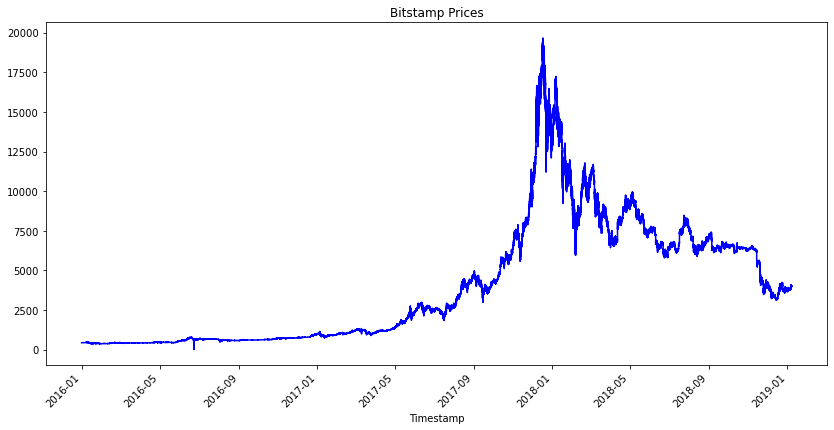

In [212]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(kind="line", title="Bitstamp Prices", figsize=(14,7), rot=45, color="blue")

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

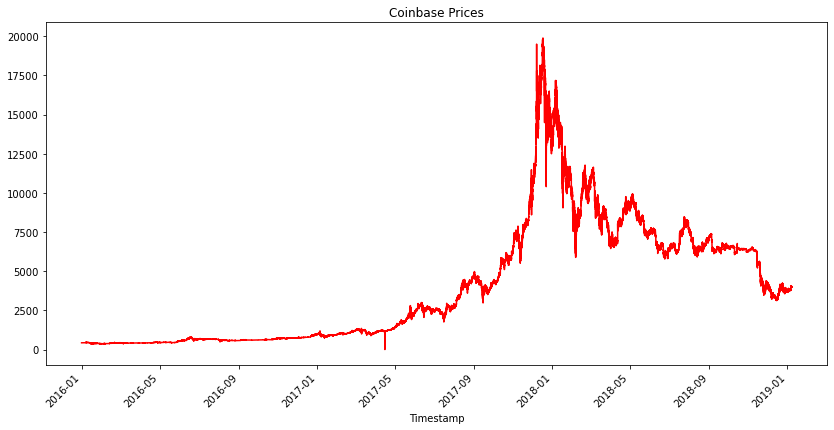

In [213]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(kind="line", title="Coinbase Prices", figsize=(14,7), rot=45, color="red")

<AxesSubplot:title={'center':'Bitstamp v Coinbase'}, xlabel='Timestamp'>

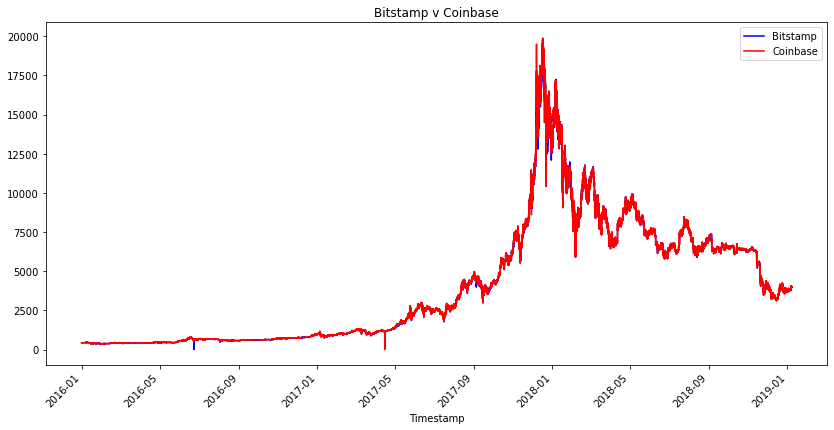

In [214]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
bitstamp_sliced.plot(legend=True, figsize=(14,7), rot=45, color="blue", title="Bitstamp v Coinbase", label="Bitstamp")
coinbase_sliced.plot(legend=True, figsize=(14,7), rot=45, color="red", label="Coinbase")

<AxesSubplot:title={'center':'Exchange Comparison (September, 2016)'}, xlabel='Timestamp'>

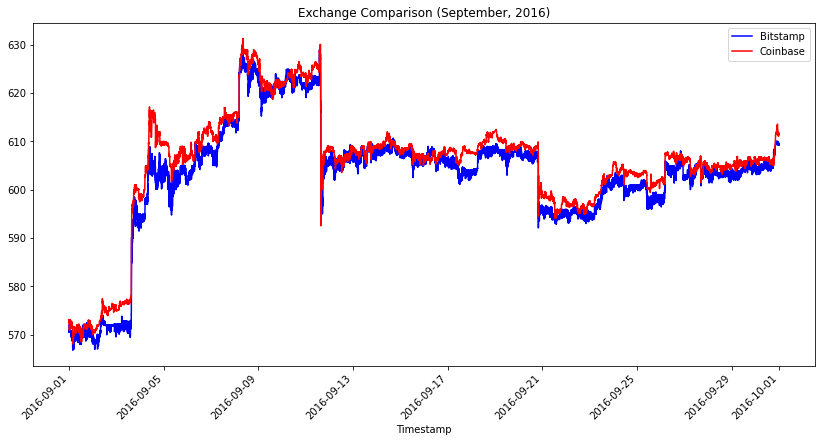

In [216]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2016-09-01':'2016-09-30'].plot(legend=True, figsize=(14,7), rot=45, color="blue", title= "Exchange Comparison (September, 2016)", label="Bitstamp")
coinbase_sliced.loc['2016-09-01':'2016-09-30'].plot(legend=True, figsize=(14,7), rot=45, color="red", label="Coinbase")

<AxesSubplot:title={'center':'Exchange Comparison (January, 2019)'}, xlabel='Timestamp'>

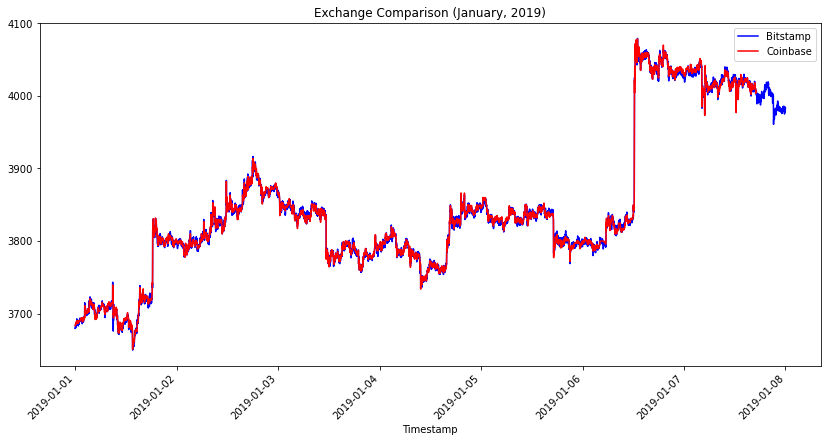

In [217]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2019-01-01':'2019-01-31'].plot(legend=True, figsize=(14,7), rot=45, color="blue", title= "Exchange Comparison (January, 2019)", label="Bitstamp")
coinbase_sliced.loc['2019-01-01':'2019-01-31'].plot(legend=True, figsize=(14,7), rot=45, color="red", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread changed as time progressed?

**Answer** Based on the visualizations, the spread has decreased between both exchages as time has progressed. 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the last year of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Daily Analysis (January 20, 2016)'}, xlabel='Timestamp'>

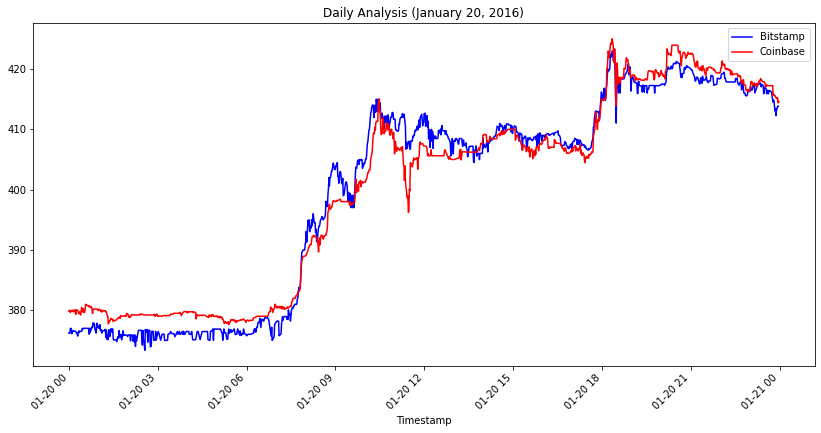

In [381]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2016-01-20'].plot(legend=True, figsize=(14, 7), rot=45, title="Daily Analysis (January 20, 2016)", color="blue", label="Bitstamp")
coinbase_sliced.loc['2016-01-20'].plot(legend=True, figsize=(14, 7), rot=45, color="red", label="Coinbase")

In [382]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
bitstamp_closing_early = bitstamp_sliced.loc['2016-01-20']
coinbase_closing_early = coinbase_sliced.loc['2016-01-20']
arbitrage_spread_early = coinbase_closing_early - bitstamp_closing_early

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1105.000000
mean        0.051955
std         2.802694
min       -11.770000
25%        -1.790000
50%         0.520000
75%         2.310000
max         5.270000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread (January 20, 2016)'}>

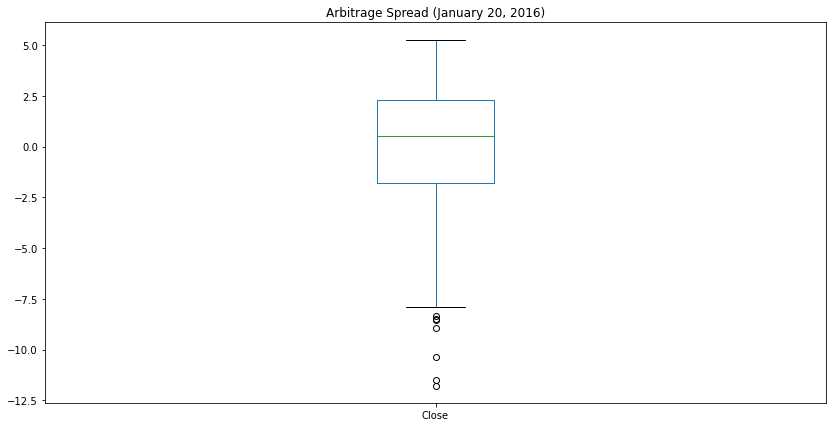

In [383]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_early.plot(kind='box', title="Arbitrage Spread (January 20, 2016)", figsize=(14,7))

<AxesSubplot:title={'center':'Daily Analysis (February 09, 2017)'}, xlabel='Timestamp'>

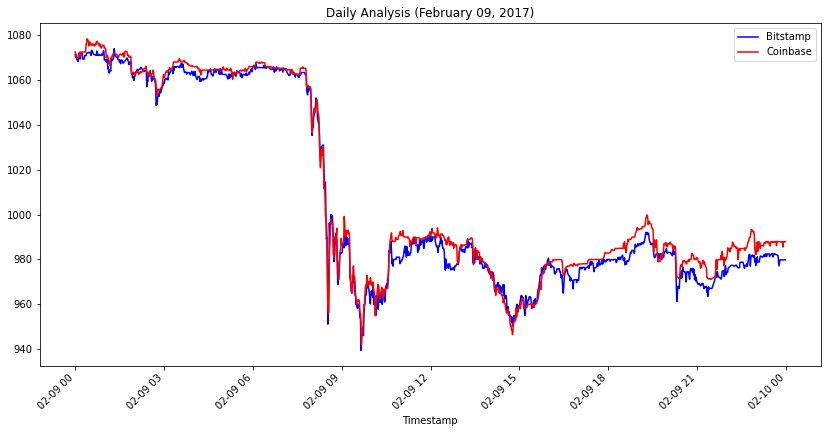

In [384]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2017-02-09'].plot(legend=True, figsize=(14, 7), rot=45, title="Daily Analysis (February 09, 2017)", color="blue", label="Bitstamp")
coinbase_sliced.loc['2017-02-09'].plot(legend=True, figsize=(14, 7), rot=45, color="red", label="Coinbase")

In [385]:
# Using the date form the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
bitstamp_closing_middle = bitstamp_sliced.loc['2017-02-09']
coinbase_closing_middle = coinbase_sliced.loc['2017-02-09']
arbitrage_spread_middle = coinbase_closing_middle - bitstamp_closing_middle

# Generate summary statistics for the early DataFrame
arbitrage_spread_middle.describe()

count    1206.000000
mean        2.961816
std         3.746991
min       -14.440000
25%         0.755000
50%         2.665000
75%         5.077500
max        13.930000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread (February 09, 2017)'}>

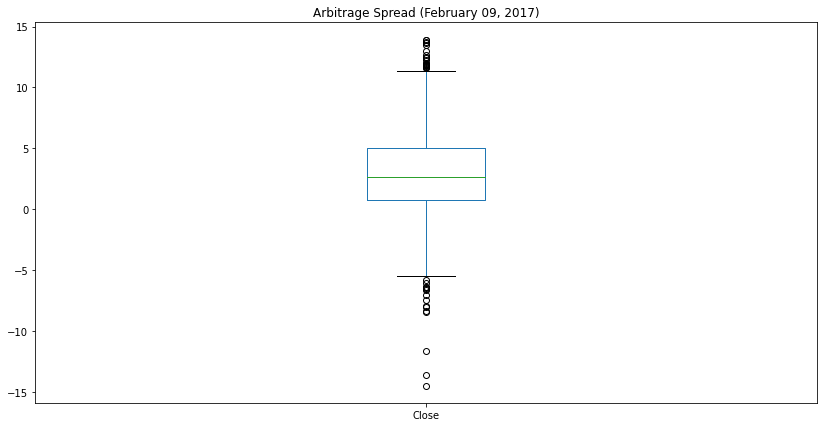

In [386]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_middle.plot(kind="box", title="Arbitrage Spread (February 09, 2017)", figsize=(14,7))

<AxesSubplot:title={'center':'Daily Analysis (January 10, 2018)'}, xlabel='Timestamp'>

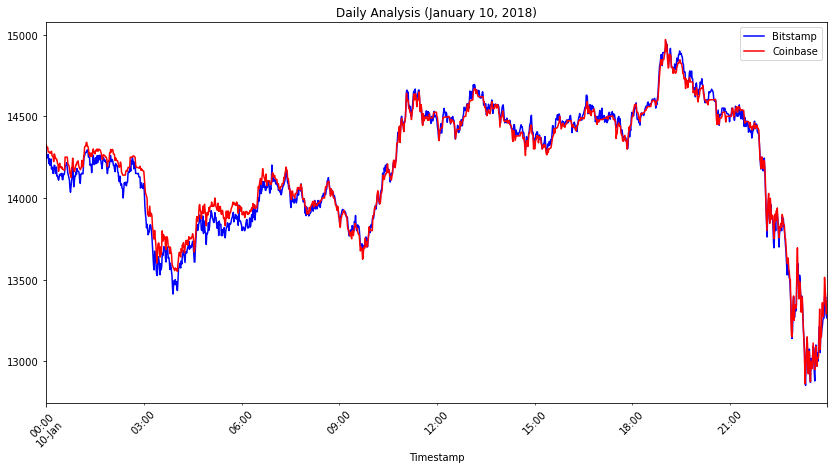

In [387]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-01-10'].plot(legend=True, figsize=(14, 7), rot=45, title="Daily Analysis (January 10, 2018)", color="blue", label="Bitstamp")
coinbase_sliced.loc['2018-01-10'].plot(legend=True, figsize=(14, 7), rot=45, color="red", label="Coinbase")

In [388]:
# Using the date from late in the dataset that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
bitstamp_closing_late = bitstamp_sliced.loc['2018-01-10']
coinbase_closing_late = coinbase_sliced.loc['2018-01-10']
arbitrage_spread_late = coinbase_closing_late - bitstamp_closing_late

# Generate summary statistics for the early DataFrame
arbitrage_spread_late.describe()

count    1440.000000
mean       15.978826
std        45.869721
min       -78.810000
25%       -17.787500
50%         6.880000
75%        46.530000
max       192.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread (January 10, 2018)'}>

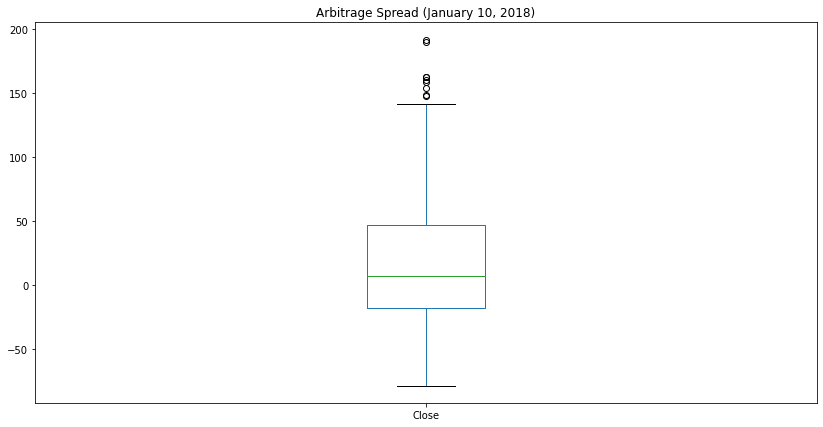

In [389]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_late.plot(kind='box', title="Arbitrage Spread (January 10, 2018)", figsize=(14,7))

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

In [390]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_closing_early - bitstamp_closing_early

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early>0].describe()

count    604.000000
mean       2.163129
std        1.139207
min        0.010000
25%        1.320000
50%        2.150000
75%        2.982500
max        5.270000
Name: Close, dtype: float64

In [391]:
# For the from the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase_closing_middle - bitstamp_closing_middle

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle[arbitrage_spread_middle>0].describe()

count    984.000000
mean       4.125254
std        2.947473
min        0.010000
25%        1.797500
50%        3.555000
75%        5.942500
max       13.930000
Name: Close, dtype: float64

In [392]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = coinbase_closing_late - bitstamp_closing_late

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late[arbitrage_spread_late>0].describe()

count    810.000000
mean      47.239704
std       35.729720
min        0.010000
25%       17.377500
50%       39.970000
75%       70.665000
max      192.000000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [393]:
# For the date early in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0) by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_closing_early

# Review the spread return DataFrame
spread_return_early.head()

Timestamp
2016-01-20 00:00:00    0.009462
2016-01-20 00:01:00    0.009860
2016-01-20 00:02:00    0.010102
2016-01-20 00:03:00    0.007083
2016-01-20 00:04:00    0.008066
Name: Close, dtype: float64

In [394]:
# For the date in the middle of the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp_closing_middle

# Review the spread return DataFrame
spread_return_middle.head()

Timestamp
2017-02-09 00:00:00    0.000905
2017-02-09 00:01:00    0.001411
2017-02-09 00:02:00    0.001019
2017-02-09 00:03:00    0.000776
2017-02-09 00:04:00    0.000954
Name: Close, dtype: float64

In [395]:
# For the date late in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_closing_late

# Review the spread return DataFrame
spread_return_late.head()

Timestamp
2018-01-10 00:00:00    0.001297
2018-01-10 00:01:00    0.005037
2018-01-10 00:02:00    0.003852
2018-01-10 00:03:00    0.004211
2018-01-10 00:04:00    0.001005
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [396]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2016-01-20 00:02:00    0.010102
2016-01-20 00:15:00    0.010019
2016-01-20 00:16:00    0.010072
2016-01-20 00:18:00    0.011392
2016-01-20 00:26:00    0.010491
Name: Close, dtype: float64

In [397]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head()

Timestamp
2017-02-09 08:52:00    0.010446
2017-02-09 09:05:00    0.014098
2017-02-09 09:39:00    0.013305
2017-02-09 09:58:00    0.012165
2017-02-09 10:14:00    0.011401
Name: Close, dtype: float64

In [398]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head()

Timestamp
2018-01-10 02:22:00    0.010001
2018-01-10 03:04:00    0.010719
2018-01-10 03:05:00    0.013895
2018-01-10 03:06:00    0.011597
2018-01-10 03:17:00    0.011663
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [399]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    54.000000
mean      0.011391
std       0.001120
min       0.010019
25%       0.010410
50%       0.011133
75%       0.012047
max       0.014093
Name: Close, dtype: float64

In [400]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    55.000000
mean      0.011568
std       0.001135
min       0.010033
25%       0.010700
50%       0.011375
75%       0.012155
max       0.014272
Name: Close, dtype: float64

In [401]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    14.000000
mean      0.011375
std       0.001300
min       0.010001
25%       0.010540
50%       0.010963
75%       0.011913
max       0.014012
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [402]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_closing_early

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2016-01-20 00:02:00    3.80
2016-01-20 00:15:00    3.77
2016-01-20 00:16:00    3.79
2016-01-20 00:18:00    4.28
2016-01-20 00:26:00    3.95
Name: Close, dtype: float64

In [403]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp_closing_middle

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle.head()

Timestamp
2017-02-09 08:52:00    10.12
2017-02-09 09:05:00    13.89
2017-02-09 09:39:00    12.50
2017-02-09 09:58:00    11.68
2017-02-09 10:14:00    10.92
Name: Close, dtype: float64

In [404]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp_closing_late

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late.head()

Timestamp
2018-01-10 02:22:00    140.01
2018-01-10 03:04:00    148.70
2018-01-10 03:05:00    192.00
2018-01-10 03:06:00    160.49
2018-01-10 03:17:00    159.10
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [405]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    54.000000
mean      4.276481
std       0.414657
min       3.770000
25%       3.910000
50%       4.175000
75%       4.520000
max       5.270000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade (January 20, 2016)'}, xlabel='Timestamp'>

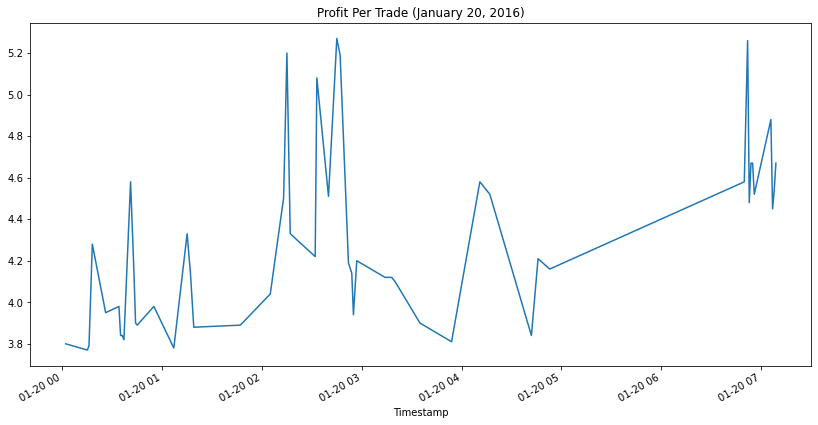

In [406]:
# Plot the results for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_early.plot(title="Profit Per Trade (January 20, 2016)", figsize=(14,7))

In [407]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count    55.000000
mean     11.268364
std       1.113943
min       9.810000
25%      10.435000
50%      10.990000
75%      11.850000
max      13.930000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade (February 09, 2017)'}, xlabel='Timestamp'>

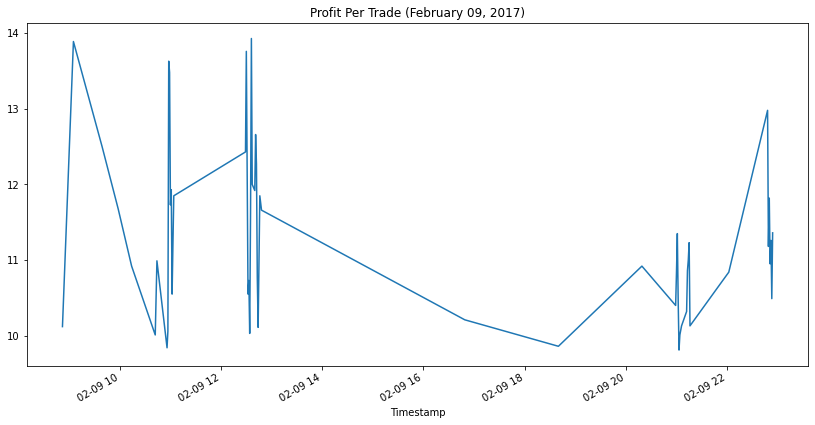

In [408]:
# Plot the results for the middle profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_middle.plot(title="Profit Per Trade (February 09, 2017)", figsize=(14,7))

In [409]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count     14.000000
mean     155.471429
std       17.641360
min      137.130000
25%      141.095000
50%      151.490000
75%      162.372500
max      192.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade (January 10, 2018)'}, xlabel='Timestamp'>

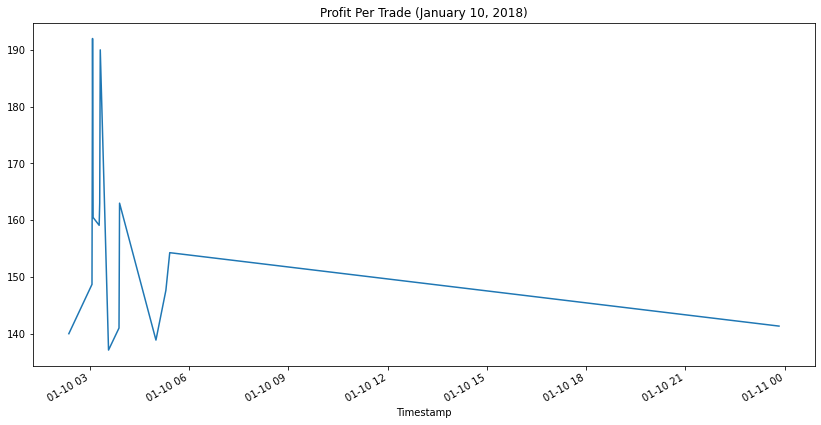

In [410]:
# Plot the results for the late profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_late.plot(title="Profit Per Trade (January 10, 2018)", figsize=(14,7))

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [411]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early

230.93

In [412]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle

619.7599999999999

In [413]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_sum_late = profit_per_trade_late.sum()
profit_sum_late

2176.600000000002

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [414]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early.tail()

Timestamp
2016-01-20 06:56:00    212.39
2016-01-20 07:06:00    217.27
2016-01-20 07:07:00    221.72
2016-01-20 07:08:00    226.26
2016-01-20 07:09:00    230.93
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Cumulative Profits (January 20, 2016)'}, xlabel='Timestamp'>

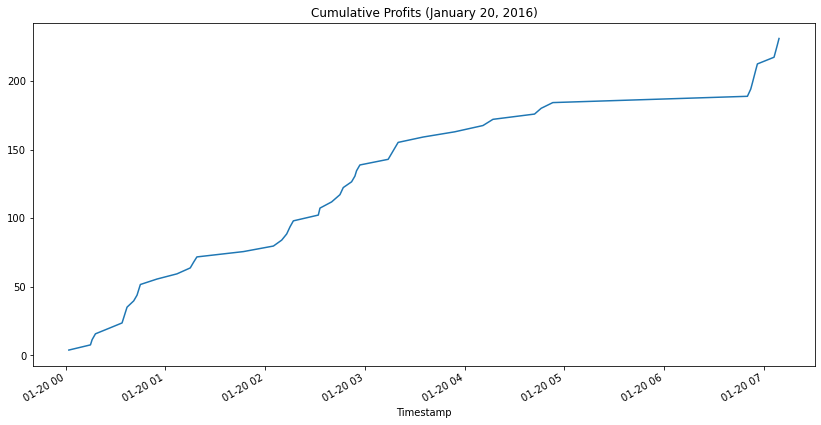

In [415]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_early.plot(figsize=(14, 7), title="Cumulative Profits (January 20, 2016)")

In [416]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle.tail()

Timestamp
2017-02-09 22:50:00    575.70
2017-02-09 22:51:00    586.65
2017-02-09 22:52:00    597.91
2017-02-09 22:53:00    608.40
2017-02-09 22:54:00    619.76
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Cumulative Profits (February 09, 2017)'}, xlabel='Timestamp'>

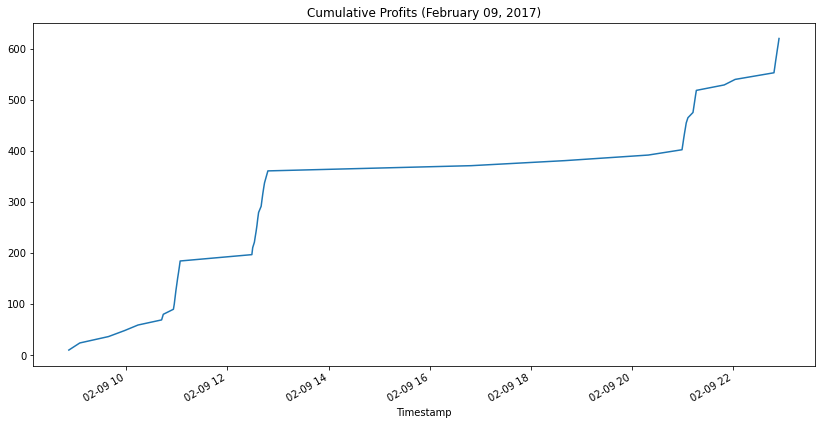

In [417]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_middle.plot(figsize=(14, 7), title="Cumulative Profits (February 09, 2017)")

In [418]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late.tail()

Timestamp
2018-01-10 03:54:00    1594.44
2018-01-10 05:00:00    1733.33
2018-01-10 05:18:00    1880.97
2018-01-10 05:25:00    2035.25
2018-01-10 23:50:00    2176.60
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Cumulative Profits (January 10, 2018)'}, xlabel='Timestamp'>

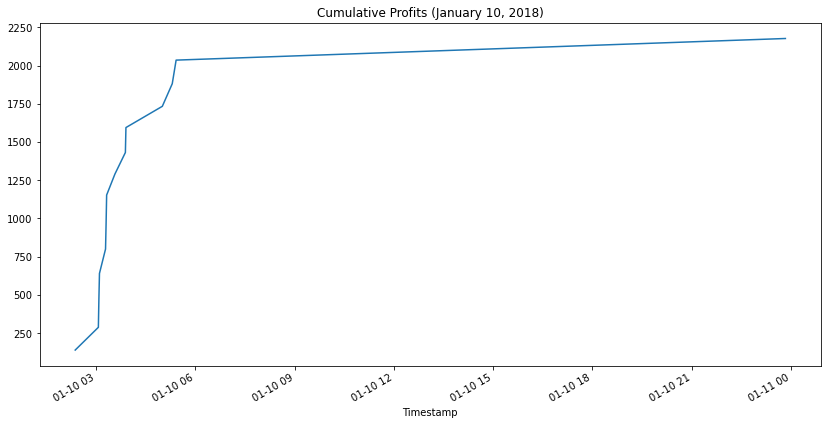

In [419]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_late.plot(figsize=(14, 7), title="Cumulative Profits (January 10, 2018)")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Arbitrage profits are extremely hard to come by at the market for Bitcoin matures across time. As Bitcoin grows in populatiry, the prices across the two exhanges trade more in line with one another. That makes is very difficult find a point where the price difference exceeds the minimum profit threshold of 1%.